In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from hilbertcurve.hilbertcurve import HilbertCurve

In [6]:
# df = pd.read_csv ('data/data.csv', usecols = ['timestamp:10881:<long>','accel_lon:10881:<double>','accel_trans:10881:<double>', 'accel_down:10881:<double>'])
# df.rename(columns = {'timestamp:10881:<long>':'ts', 'accel_lon:10881:<double>':'accel_long', 'accel_trans:10881:<double>':'accel_trans', 'accel_down:10881:<double>':'accel_down'}, inplace = True)

df = pd.read_csv ('thesis_data/data/SteeringWheelAngle-10Hz.csv', usecols = ['sent.seconds','sent.microseconds','received.seconds', 'accel_down:10881:<double>'])

In [7]:
df

ts  accel_long  accel_trans  accel_down
0      1646666459092289   -0.007067     0.010191    0.023798
1      1646666459142313    0.016714    -0.053451   -0.091782
2      1646666459192324   -0.064363     0.020932    0.089398
3      1646666459242353    0.086184    -0.057222   -0.138364
4      1646666459292302   -0.086896     0.039136    0.156289
...                 ...         ...          ...         ...
10876  1646667002910589   -0.044285     0.045432    0.053489
10877  1646667002960554    0.014795    -0.037504   -0.057202
10878  1646667003010583   -0.078249    -0.005558    0.024890
10879  1646667003060578    0.027714    -0.033445   -0.075416
10880  1646667003110577   -0.078318    -0.023231    0.039319

[10881 rows x 4 columns]

In [8]:
faktor_multiply = 1000000; offset = 10

df['accel_long']=df['accel_long'].add(offset)
df['accel_trans']=df['accel_trans'].add(offset)
df['accel_down']=df['accel_down'].add(offset)


df['accel_long'] = df.apply(lambda x: int(x['accel_long']*faktor_multiply) , axis=1)
df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*faktor_multiply) , axis=1)
df['accel_down'] = df.apply(lambda x: int(x['accel_down']*faktor_multiply) , axis=1)

df

ts  accel_long  accel_trans  accel_down
0      1646666459092289     9992932     10010190    10023798
1      1646666459142313    10016714      9946548     9908218
2      1646666459192324     9935636     10020932    10089398
3      1646666459242353    10086184      9942777     9861636
4      1646666459292302     9913104     10039135    10156289
...                 ...         ...          ...         ...
10876  1646667002910589     9955715     10045432    10053488
10877  1646667002960554    10014794      9962496     9942797
10878  1646667003010583     9921750      9994442    10024890
10879  1646667003060578    10027714      9966554     9924584
10880  1646667003110577     9921681      9976768    10039319

[10881 rows x 4 columns]

<AxesSubplot:xlabel='accel_long', ylabel='accel_trans'>

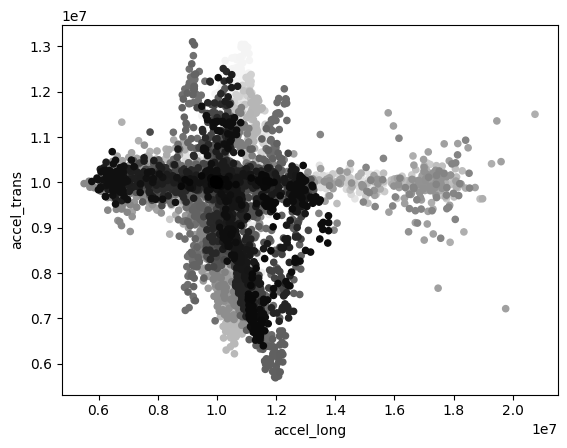

In [9]:
df.plot(kind='scatter',x='accel_long',y='accel_trans',color=df['ts'])

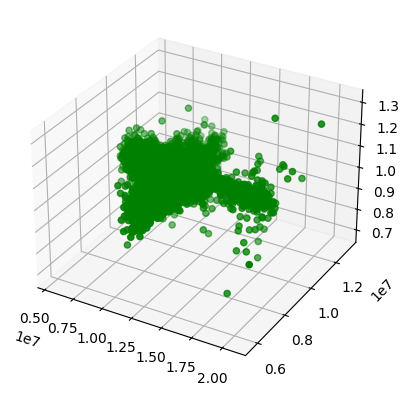

In [10]:
#creating 3D-Plot
ax = plt.axes(projection ="3d")

ax.scatter3D(df['accel_long'],df['accel_trans'],df['accel_down'], color = "green")


In [11]:
resolution = 26; dimension = 2
hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

points = df[['accel_long','accel_trans']].to_numpy()

distances = hilbert_curve.distances_from_points(points)

In [12]:
df_hilbert = pd.concat([df, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)
df_hilbert

ts  accel_long  accel_trans  accel_down          hilbert
0      1646666459092289     9992932     10010190    10023798  143489758284998
1      1646666459142313    10016714      9946548     9908218  143851526725494
2      1646666459192324     9935636     10020932    10089398  143482998987552
3      1646666459242353    10086184      9942777     9861636  143848003730217
4      1646666459292302     9913104     10039135    10156289  143478196580949
...                 ...         ...          ...         ...              ...
10876  1646667002910589     9955715     10045432    10053488  143481007521765
10877  1646667002960554    10014794      9962496     9942797  143487670071532
10878  1646667003010583     9921750      9994442    10024890  143484097962450
10879  1646667003060578    10027714      9966554     9924584  143501998399816
10880  1646667003110577     9921681      9976768    10039319  143485083923371

[10881 rows x 5 columns]

(array([2.500e+01, 4.700e+01, 4.000e+00, 1.527e+03, 5.409e+03, 1.216e+03,
        2.860e+02, 3.470e+02, 5.000e+00, 0.000e+00, 0.000e+00, 1.500e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        1.730e+02, 1.280e+02, 8.300e+01, 0.000e+00, 0.000e+00, 1.000e+00,
        1.800e+01, 1.152e+03, 2.740e+02, 1.000e+00, 2.900e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

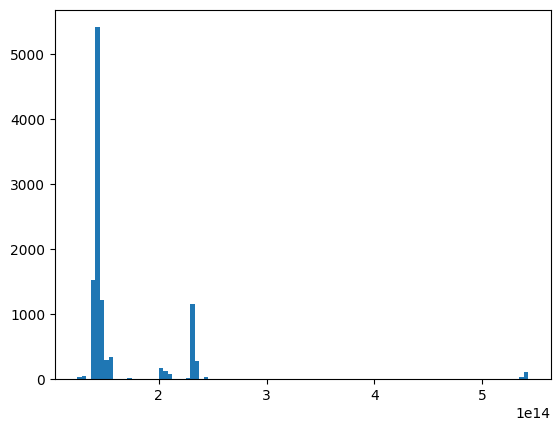

In [13]:
plt.hist(distances, bins = 100)

In [14]:
# these values are from coordinates
max_value = (2**resolution)-1

Q1 = [(int((max_value/2)+0.5), int((max_value/2)+0.5)), (max_value, max_value)] # oben rechts
Q2 = [(0, int((max_value/2)+0.5)), (int((max_value/2)-0.5), max_value)] #oben links
Q3 = [(0, 0), (int((max_value/2)-0.5), int((max_value/2)-0.5))] #unten links
Q4 = [(int((max_value/2)+0.5), 0), (max_value, int((max_value/2)-0.5))] # unten rechts   

In [87]:
#these values are hilbert curve specific
max_value = (2**resolution)-1

Q1 = [(int((max_value/2)+0.5), int((max_value/2)+0.5)), (max_value, int((max_value/2)+0.5))] # oben rechts
Q2 = [(0, int((max_value/2)+0.5)), (int((max_value/2)-0.5), int((max_value/2)+0.5))] #oben links
Q3 = [(0, 0), (0, int((max_value/2)-0.5))] #unten links
Q4 = [(max_value, int((max_value/2)+0.5)), (max_value, 0)] # unten rechts   

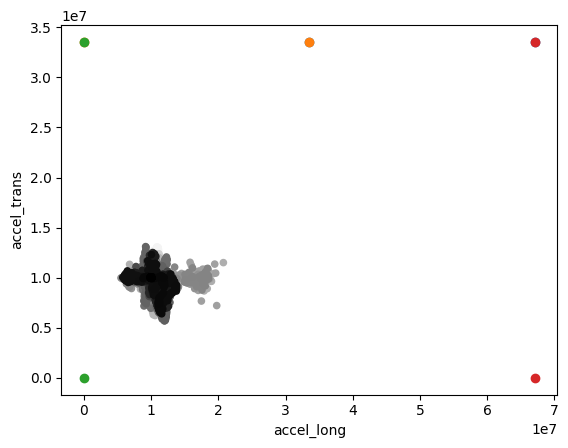

In [89]:
df.plot(kind='scatter',x='accel_long',y='accel_trans',color=df['ts'])
plt.scatter(*zip(*Q1))
plt.scatter(*zip(*Q2))
plt.scatter(*zip(*Q3))
plt.scatter(*zip(*Q4))